# 卷积神经网络

## 卷积运算

卷积神经网络是人工神经网络的一种，已成为当前语音分析和图像识别领域的研究热点。

它的权值共享网络结构使之更类似于生物神经网络，降低了网络模型的复杂度，减少了权值的数量。该优点在网络的输入是多维图像时表现的更为明显，使图像可以直接作为网络的输入，避免了传统识别算法中复杂的特征提取和数据重建过程。

卷积网络是为识别二维形状而特殊设计的一个多层感知器，这种网络结构对平移、比例缩放、倾斜或者共他形式的变形具有高度不变性。

卷积是两个变量在某范围内相乘后求和的结果。如果卷积的变量是序列x(n)和h(n)，则卷积的结果

$$
y(n)=\sum_{i=-\infty}^{\infty} x(i) h(n-i)=x(n) * h(n)
$$


其中星号*表示卷积。

当时序n=0时，序列h(-i)是h(i)的时序i取反的结果；时序取反使得h(i)以纵轴为中心翻转180度，所以这种相乘后求和的计算法称为卷积和，简称卷积。

另外，n是使h(-i)位移的量，不同的n对应不同的卷积结果。

如果卷积的变量是函数x(t)和h(t)，则卷积的计算变为

$$
y(t)=\int_{-\infty}^{\infty} x(p) h(t-p) d p=x(t) * h(t)
$$

其中p是积分变量，积分也是求和，t是使函数h(-p)位移的量，星号*表示卷积。


### 一维卷积的两种计算方法：

- 1.h(n)序列倒置->位移->相乘->取和

举例：x(n) = [4,3,2,1]，h(n) = [3,2,1]。

h(n)倒置为h'(n)[1,2,3]，逐渐从前向x(n)位移，直到h'(n)最后一个元素3与x(n)第一个元素4接触时，开始相乘，也就是将两个序列相交的元素相乘并求和。

因此x(n)*h(n) = [4×3,2×4+3×3,1×4+2×3+3×2,1×3+2×2+3×1,1×2+2×1,1×1]  = [12,17,16,10,4,1]

2.对位相乘求和。

步骤：①两序列右对齐；②逐个元素对应相乘但是不进位；③同列乘值相加

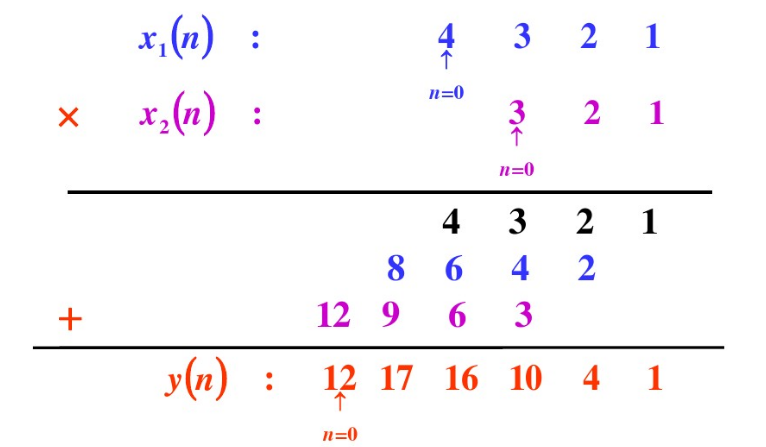

### 矩阵卷积：

同一维数据卷积一样，它的实质在于将卷积模板图像翻转（旋转180°），这里等同于一维信号的翻转，然后将卷积模板依次从上到下、从左到右滑动，计算在模板与原始图像交集元素的乘积和，该和就作为卷积以后的数值。

假设矩阵A（4*3）、B（2*3）如下：

首先，B需要旋转180，，然后不断平移、相乘、求和。依次计算直至结束

   卷积结果shape的取值有三种，令mA表示矩阵A的行数，nA代表矩阵A的列数。full代表返回卷积以后的全部数据，即为(mA+mB-1,nA+nB-1)；same代表返回卷积以后的原图size (mA,nA)的部分数据；valid返回size为(mA-mB+1,nA-nB+1)的数据，指的是模板元素全部参加运算的结果数据，即源图像和模板的交集为模板。

## 池化（Pooling）

池化：也称为欠采样或下采样。主要用于特征降维，压缩数据和参数的数量，减小过拟合，同时提高模型的容错性。主要有：

Max Pooling：最大池化
Average Pooling：平均池化




## TextCNN

TextCNN 是利用卷积神经网络对文本进行分类的算法，由 Yoon Kim 在 “Convolutional Neural Networks for Sentence Classification” 一文中提出. 是2014年的算法.

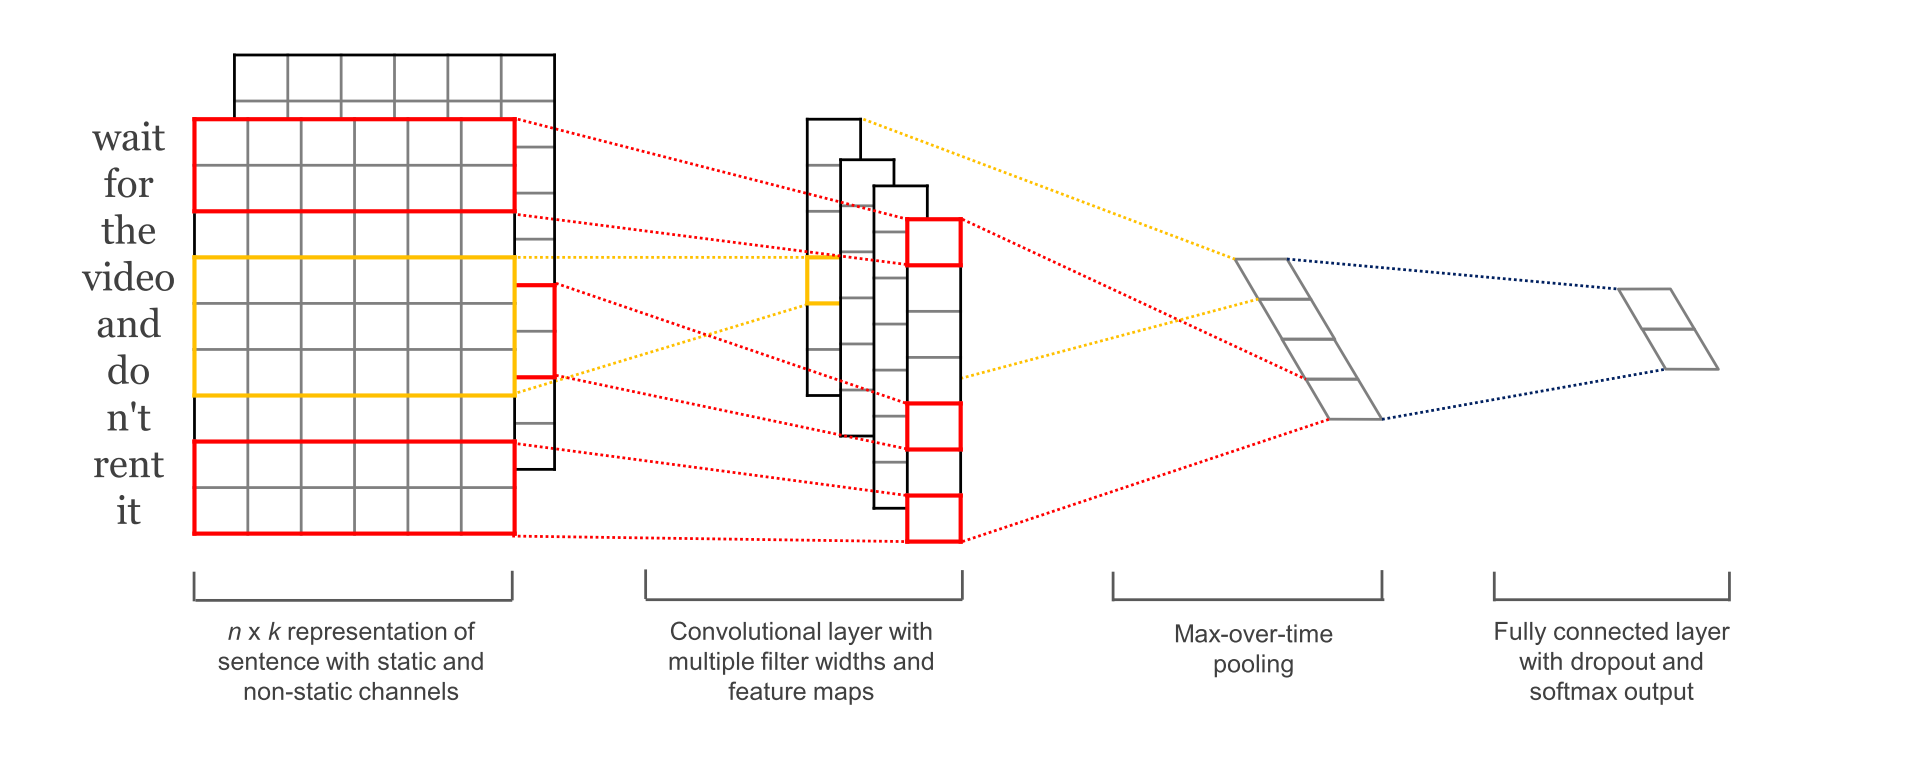

TextCNN详细过程：

- Embedding：第一层是图中最左边的7乘5的句子矩阵，每行是词向量，维度=5，这个可以类比为图像中的原始像素点。
- Convolution：然后经过 kernel_sizes=(2,3,4) 的一维卷积层，每个kernel_size 有两个输出 channel。
- MaxPolling：第三层是一个1-max pooling层，这样不同长度句子经过pooling层之后都能变成定长的表示。
- FullConnection and Softmax：最后接一层全连接的 softmax 层，输出每个类别的概率。



通道（Channels）：

图像中可以利用 (R, G, B) 作为不同channel；
文本的输入的channel通常是不同方式的embedding方式（比如 word2vec或Glove），实践中也有利用静态词向量和fine-tunning词向量作为不同channel的做法。
 



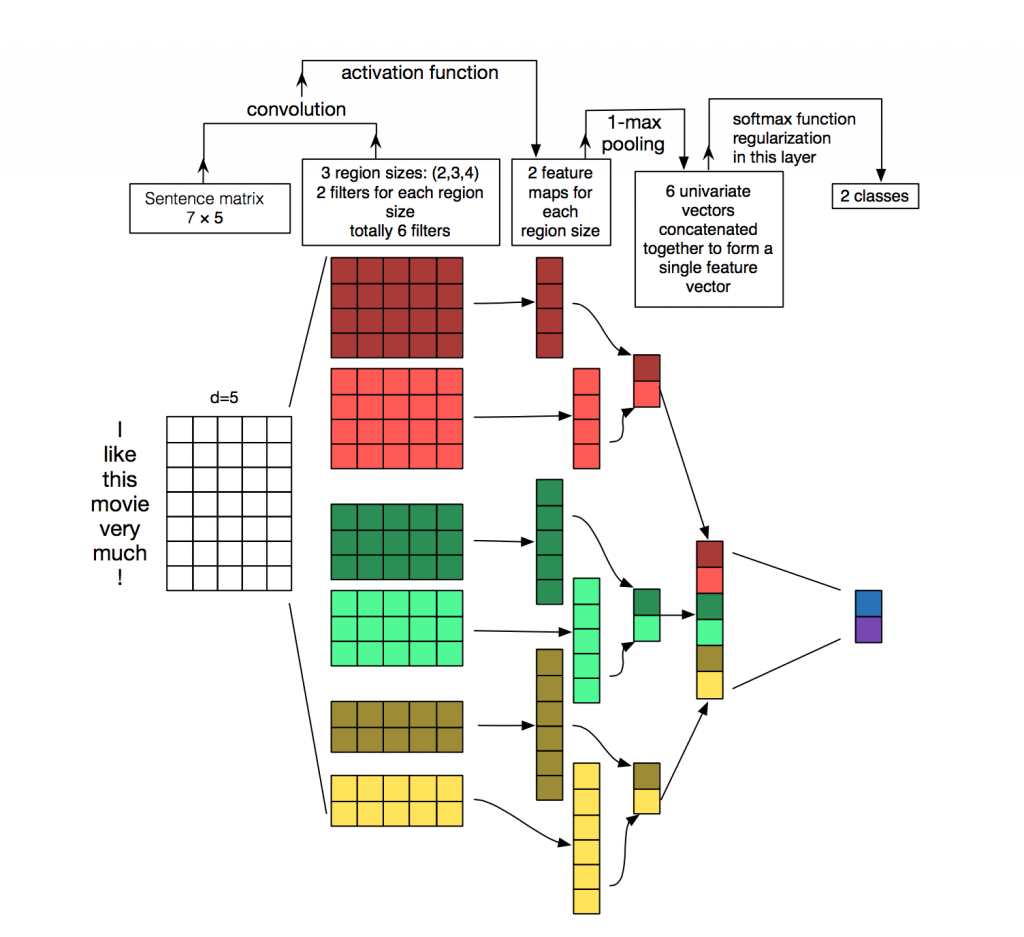

## 参数与超参数
- sequence_length 
Q: 对于CNN, 输入与输出都是固定的，可每个句子长短不一, 怎么处理? 
A: 需要做定长处理, 比如定为n, 超过的截断, 不足的补0. 注意补充的0对后面的结果没有影响，因为后面的max-pooling只会输出最大值，补零的项会被过滤掉.
- num_classes 
多分类, 分为几类.
- vocabulary_size 
语料库的词典大小, 记为|D|.
- embedding_size 
将词向量的维度, 由原始的 |D| 降维到 embedding_size.
- filter_size_arr 
多个不同size的filter.

## Embedding Layer
通过一个隐藏层, 将 one-hot 编码的词 投影 到一个低维空间中. 
本质上是特征提取器，在指定维度中编码语义特征. 这样, 语义相近的词, 它们的欧氏距离或余弦距离也比较近.

## Convolution Layer
为不同尺寸的 filter 都建立一个卷积层. 所以会有多个 feature map. 
图像是像素点组成的二维数据, 有时还会有RGB三个通道, 所以它们的卷积核至少是二维的. 
从某种程度上讲, word is to text as pixel is to image, 所以这个卷积核的 size 与 stride 会有些不一样.

.
## Max-Pooling Layer
max-pooling只会输出最大值, 对输入中的补0 做过滤.

## SoftMax 分类 Layer
最后接一层全连接的 softmax 层，输出每个类别的概率。

## 小的变种
在 word representation 处理上会有一些变种.

- CNN-rand 
设计好 embedding_size 这个 Hyperparameter 后, 对不同单词的向量作随机初始化, 后续BP的时候作调整.
- static 
拿 pre-trained vectors from word2vec, FastText or GloVe 直接用, 训练过程中不再调整词向量. 这也算是迁移学习的一种思想.
- non-static 
pre-trained vectors + fine tuning , 即拿word2vec训练好的词向量初始化, 训练过程中再对它们微调.
- multiple channel 
类比于图像中的RGB通道, 这里也可以用 static 与 non-static 搭两个通道来搞.

一些结果表明，max-pooling 总是优于 average-pooling ，理想的 filter sizes 是重要的，但具体任务具体考量，而用不用正则化似乎在NLP任务中并没有很大的不同。

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
x = tf.placeholder(tf.float32,[None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])





Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
#----Weight Initialization---#
#One should generally initialize weights with a small amount of noise for symmetry breaking, and to prevent 0 gradients
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [5]:
#Convolution and Pooling
#Our convolutions uses a stride of one and are zero padded so that the output is the same size as the input.
#Our pooling is plain old max pooling over 2x2 blocks
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [8]:
#To apply the layer, we first reshape x to a 4d tensor, with the second and third dimensions corresponding to image width and height,
#and the final dimension corresponding to the number of color channels.
x_image = tf.reshape(x, [-1,28,28,1])

下面我们就要开始搭建CNN结构了。 

step 5 搭建第一个卷积层
使用32个5x5的filter，然后通过maxpooling。

In [9]:
#----first convolution layer----#
#he convolution will compute 32 features for each 5x5 patch. Its weight tensor will have a shape of [5, 5, 1, 32].
#The first two dimensions are the patch size,
#the next is the number of input channels, and the last is the number of output channels.
W_conv1 = weight_variable([5,5,1,32])

#We will also have a bias vector with a component for each output channel.
b_conv1 = bias_variable([32])

#We then convolve x_image with the weight tensor, add the bias, apply the ReLU function, and finally max pool.
#The max_pool_2x2 method will reduce the image size to 14x14.
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
#----second convolution layer----#
#The second layer will have 64 features for each 5x5 patch and input size 32.
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [11]:
#----fully connected layer----#
#Now that the image size has been reduced to 7x7, we add a fully-connected layer with 1024 neurons to allow processing on the entire image
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1) + b_fc1)

In [12]:
#-----dropout------#
#To reduce overfitting, we will apply dropout before the readout layer.
#We create a placeholder for the probability that a neuron's output is kept during dropout.
#This allows us to turn dropout on during training, and turn it off during testing.
keep_prob = tf.placeholder(tf.float32)
h_fc1_dropout = tf.nn.dropout(h_fc1, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
#----read out layer----#
W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_dropout, W_fc2) + b_fc2

In [15]:
#------train and evaluate----#
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_, 1), tf.argmax(y_conv, 1)), tf.float32))
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(3000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict = {x: batch[0],
                                                       y_: batch[1],
                                                       keep_prob: 1.})
            print('setp {},the train accuracy: {}'.format(i, train_accuracy))
        train_step.run(feed_dict = {x: batch[0], y_: batch[1], keep_prob: 0.5})
    test_accuracy = accuracy.eval(feed_dict = {x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.})
    print('the test accuracy :{}'.format(test_accuracy))
    saver = tf.train.Saver()
    path = saver.save(sess, './my_net/mnist_deep.ckpt')
    print('save path: {}'.format(path))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

setp 0,the train accuracy: 0.03999999910593033
setp 100,the train accuracy: 0.8399999737739563
setp 200,the train accuracy: 0.9599999785423279
setp 300,the train accuracy: 0.8799999952316284
setp 400,the train accuracy: 0.8999999761581421
setp 500,the train accuracy: 0.9800000190734863
setp 600,the train accuracy: 0.9800000190734863
setp 700,the train accuracy: 0.9399999976158142
setp 800,the train accuracy: 0.9599999785423279
setp 900,the train accuracy: 0.9399999976158142
setp 1000,the train accuracy: 0.9800000190734863
setp 1100,the train accuracy: 0.9599999785423279
setp 1200,the train accuracy: 0.9599999785423279
setp 1300,the train accuracy: 0.9800000190734863
setp 1400,the train accuracy: 0.9800000190734863
setp 1500,the train accuracy: 0.8999999761581421
setp 1600,the train accuracy: 0.9599